<a href="https://colab.research.google.com/github/miguelangelrestrepo/PROYECTO_PUBG/blob/main/PROYECTO_PUBG_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***#1***

**Librerías y bibliotecas de machine learning.**

In [1]:
# Librerías

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
import os
import json
import random

# Bibliotecas de machine learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Advertencias

import warnings
warnings.filterwarnings('ignore')

#***#2***

**Instalar Kaggle, acceder al contenido y cargar las credenciales de Kaggle.**

In [2]:
!pip install kaggle
os.environ['KAGGLE_CONFIG_DIR']='/content/'
data = {"username": "miguelrestrepo2020", "key": "56fb6a22b015e063a8924fb78cdcc74a"}
with open('kaggle.json','w') as file:
  json.dump(data, file, indent=4)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#***#3***

**Descargar el dataset.**

In [3]:
# Si la linea 4 se queda esperando una respuesta, debes escribir 'A' y dar Enter.

!kaggle competitions download -c pubg-finish-placement-prediction
!unzip \*.zip && rm *.zip

 98% 355M/361M [00:01<00:00, 265MB/s]
100% 361M/361M [00:01<00:00, 278MB/s]
Archive:  pubg-finish-placement-prediction.zip
replace sample_submission_V2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_submission_V2.csv  
  inflating: test_V2.csv             
  inflating: train_V2.csv            


#***#4***

**Definir e imprimir.**

In [4]:
df_sam_sub=pd.read_csv("sample_submission_V2.csv")
df_sam_sub

,Id,winPlacePerc
0,9329eb41e215eb,1
1,639bd0dcd7bda8,1
2,63d5c8ef8dfe91,1
3,cf5b81422591d1,1
4,ee6a295187ba21,1
...,...,...
1934169,a316c3a13887d5,1
1934170,5312146b27d875,1
1934171,fc8818b5b32ad3,1
1934172,a0f91e35f8458f,1


In [5]:
df_test=pd.read_csv("test_V2.csv")
df_test

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.000,0,0,588.00,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.000,0,0,2017.00,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.000,0,0,787.80,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.000,0,0,1812.00,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.000,0,0,2963.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,a316c3a13887d5,80e82180c90951,f276da5fd73536,1,2,381.00,3,0,7,4,...,-1,1,0.0,0,0.000,0,0,1799.00,5,1526
1934170,5312146b27d875,147264a127c56e,fb77cbfe094a6b,0,0,0.00,0,0,0,64,...,-1,0,0.0,0,0.000,0,0,1195.00,3,1496
1934171,fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,0,91.96,0,0,3,24,...,1482,0,0.0,0,7.798,1,0,3327.00,3,0
1934172,a0f91e35f8458f,149a506a64c2b1,3a2cf335bc302f,1,2,138.60,0,0,12,25,...,1456,1,0.0,0,0.000,0,0,1893.00,4,0


In [6]:
df_train=pd.read_csv("train_V2.csv")
df_train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


#***#5***

**Tipo de coincidencia, fusión y soltar.**

In [7]:
# Tipo de coincidencia entre las bases

dummies_train = pd.get_dummies(df_train['matchType'])
dummies_test = pd.get_dummies(df_test['matchType'])

# Fusionamos los datos

df_train = pd.concat([df_train, dummies_train], axis=1)
df_test = pd.concat([df_test, dummies_test], axis=1)

# Eliminamos IDS (3)

df_train.drop(['Id', 'groupId', 'matchId', 'matchType'], axis=1, inplace=True)

# Mostramos como quedó...

df_train.isna().sum()

assists             0
boosts              0
damageDealt         0
DBNOs               0
headshotKills       0
heals               0
killPlace           0
killPoints          0
kills               0
killStreaks         0
longestKill         0
matchDuration       0
maxPlace            0
numGroups           0
rankPoints          0
revives             0
rideDistance        0
roadKills           0
swimDistance        0
teamKills           0
vehicleDestroys     0
walkDistance        0
weaponsAcquired     0
winPoints           0
winPlacePerc        1
crashfpp            0
crashtpp            0
duo                 0
duo-fpp             0
flarefpp            0
flaretpp            0
normal-duo          0
normal-duo-fpp      0
normal-solo         0
normal-solo-fpp     0
normal-squad        0
normal-squad-fpp    0
solo                0
solo-fpp            0
squad               0
squad-fpp           0
dtype: int64

#***#6***

**Eliminación.**

In [8]:
df_train.dropna(0, inplace=True)

# Comprobamos si efectivamente se eliminó una fila...

df_train.shape

(4446965, 41)

#***#7***

**Modelamiento de pre-procesamiento de datos.**

In [9]:
# Obtenemos primero todas las variables

feature_cols = df_train.columns[df_train.columns!='winPlacePerc']
X = df_train[feature_cols]
y = df_train.winPlacePerc

# Comprobamos

print(X.shape)
print(y.shape)

# Creamos una división de prueba

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Escalado de características

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

(4446965, 40)
(4446965,)


#***#8***

**Regresión Lineal.**

In [10]:
# Instanciar
linreg = LinearRegression()

# Adaptar
linreg.fit(X_train, y_train)

# Predecir
y_pred = linreg.predict(X_test)

# Evaluar
mean_absolute_error(y_pred, y_test)

0.08995096224360145

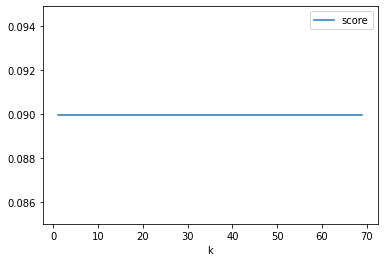

In [11]:
scores = []
for k in range(1,70):
  score = mean_absolute_error(y_pred, y_test)
  scores.append([k, score])
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score'); 

#***#9***

**Regresión de árbol de desición**

In [12]:
# Esto demora unos 2 minutos

# Instanciar el clasificador
tree = DecisionTreeRegressor()

# Entrenar el modelo en el conjunto de entrenamiento
tree.fit(X_train, y_train)

# Predecir
y_pred = tree.predict(X_test)

# Evaluar la métrica
mean_absolute_error(y_pred, y_test)

0.08104056858515735

#***#10*** 
**Enviar a Kaggle.** 

In [13]:
def submission(df, features, algorithm):
    x_oos = df[features]
    algo = algorithm
    algo.fit(X_train, y_train)
    pred = algo.predict(x_oos)
    test_id = df["Id"]
    sub = pd.DataFrame({'Id': test_id, "winPlacePerc": pred} , columns=['Id', 'winPlacePerc'])
    return sub

In [14]:
# Esto demorará aproximadamente 2 minutos..
submission(df_test, feature_cols, DecisionTreeRegressor())

,Id,winPlacePerc
0,9329eb41e215eb,0.1481
1,639bd0dcd7bda8,0.3077
2,63d5c8ef8dfe91,0.1481
3,cf5b81422591d1,0.1667
4,ee6a295187ba21,0.1481
...,...,...
1934169,a316c3a13887d5,0.1935
1934170,5312146b27d875,0.1724
1934171,fc8818b5b32ad3,0.1481
1934172,a0f91e35f8458f,0.1667


In [15]:
# Esto demorará unos 2 minutos...

# Crear un archivo de envío

# Predecir las probabilidades de clase para los datos de prueba reales
X_oos = df_test[feature_cols]

def submission2(df, features, algorithm):
    algo = algorithm
    algo.fit(X_train, y_train)
    pred = algo.predict(X_oos)
    test_id = df_test["Id"]
    sub = pd.DataFrame({'Id': test_id, "winPlacePerc": pred} , columns=['Id', 'winPlacePerc'])
    return sub.to_csv("submission2.csv", index =   False)

submission2(df_test, feature_cols, DecisionTreeRegressor())

**FIN...**